In [2]:
# !pip install tsfresh
!pip3 install tsfresh
# 安裝完要restart kernel

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


  Obtaining dependency information for tsfresh from https://files.pythonhosted.org/packages/83/bb/987ae7320d31b2c1c1135d8809a59c329c35553fa2f597fc9a4052ce8a27/tsfresh-0.21.0-py2.py3-none-any.whl.metadata
  Using cached tsfresh-0.21.0-py2.py3-none-any.whl.metadata (2.6 kB)
  Obtaining dependency information for stumpy>=1.7.2 from https://files.pythonhosted.org/packages/43/0f/305bc39f513eb7cb6406f1cd445f58f2b260526693afbe900dc6e9802410/stumpy-1.13.0-py3-none-any.whl.metadata
  Using cached stumpy-1.13.0-py3-none-any.whl.metadata (28 kB)
  Obtaining dependency information for scipy>=1.14.0 from https://files.pythonhosted.org/packages/b9/8b/7ec1832b09dbc88f3db411f8cdd47db04505c4b72c99b11c920a8f0479c3/scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached tsfresh-0.21.0-py2.py3-none-any.whl (96 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached stumpy-1.13.0-py3-none-any.whl (176 kB)
  A

In [2]:
pip install -r requirements.txt
# 解決numpy版本的問題

  Obtaining dependency information for numpy==1.24 from https://files.pythonhosted.org/packages/3f/b8/3c549c217405795ec76a947c0e7fc90c0a698542d1b55e0df51d45916be9/numpy-1.24.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB 660.6 kB/s eta 0:00:23
   ---------------------------------------- 0.1/14.8 MB 1.6 MB/s eta 0:00:10
   - -------------------------------------- 0.4/14.8 MB 3.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/14.8 MB 5.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/14.8 MB 6.5 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/14.8 MB 7.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/14.8 MB 8.1 MB/s eta 0:00:02
   -------- ------------------------------- 3.1/14.8 MB 8.5 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/14.8 MB 8.9 MB/s eta 0:00:02
   ----------- ---------

ERROR: Could not install packages due to an OSError: [WinError 5] 存取被拒。: 'C:\\ProgramData\\anaconda\\Lib\\site-packages\\~.mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

C:\ProgramData\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# load data

X = pd.read_csv("occupancy.csv", parse_dates=["date"])

print(X.shape)

X.head()

(8100, 7)


,id,date,temperature,humidity,light,co2,humidity_ratio
0,1,2015-02-04 18:00:00,23.075,27.175000,419.0,688.00,0.004745
1,1,2015-02-04 18:01:00,23.075,27.150000,419.0,690.25,0.004741
2,1,2015-02-04 18:02:00,23.100,27.100000,419.0,691.00,0.004739
3,1,2015-02-04 18:03:00,23.100,27.166667,419.0,683.50,0.004751
4,1,2015-02-04 18:04:00,23.050,27.150000,419.0,687.50,0.004734


In [3]:
# load target

y = pd.read_csv("occupancy_target.csv", index_col="id")
y = pd.Series(y["occupancy"])

print(y.shape)

y.head()

(135,)


id
1    0
2    0
3    0
4    0
5    0
Name: occupancy, dtype: int64

In [4]:
# function to plot subtime series

def plot_timeseries(n_id):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

    X[X["id"] == n_id]["temperature"].plot(ax=axes[0, 0], title="temperature")
    X[X["id"] == n_id]["humidity"].plot(ax=axes[0, 1], title="humidity")
    X[X["id"] == n_id]["light"].plot(ax=axes[0, 2], title="light")
    X[X["id"] == n_id]["co2"].plot(ax=axes[1, 0], title="co2")
    X[X["id"] == n_id]["humidity_ratio"].plot(ax=axes[1, 1], title="humidity_ratio")

    plt.show()

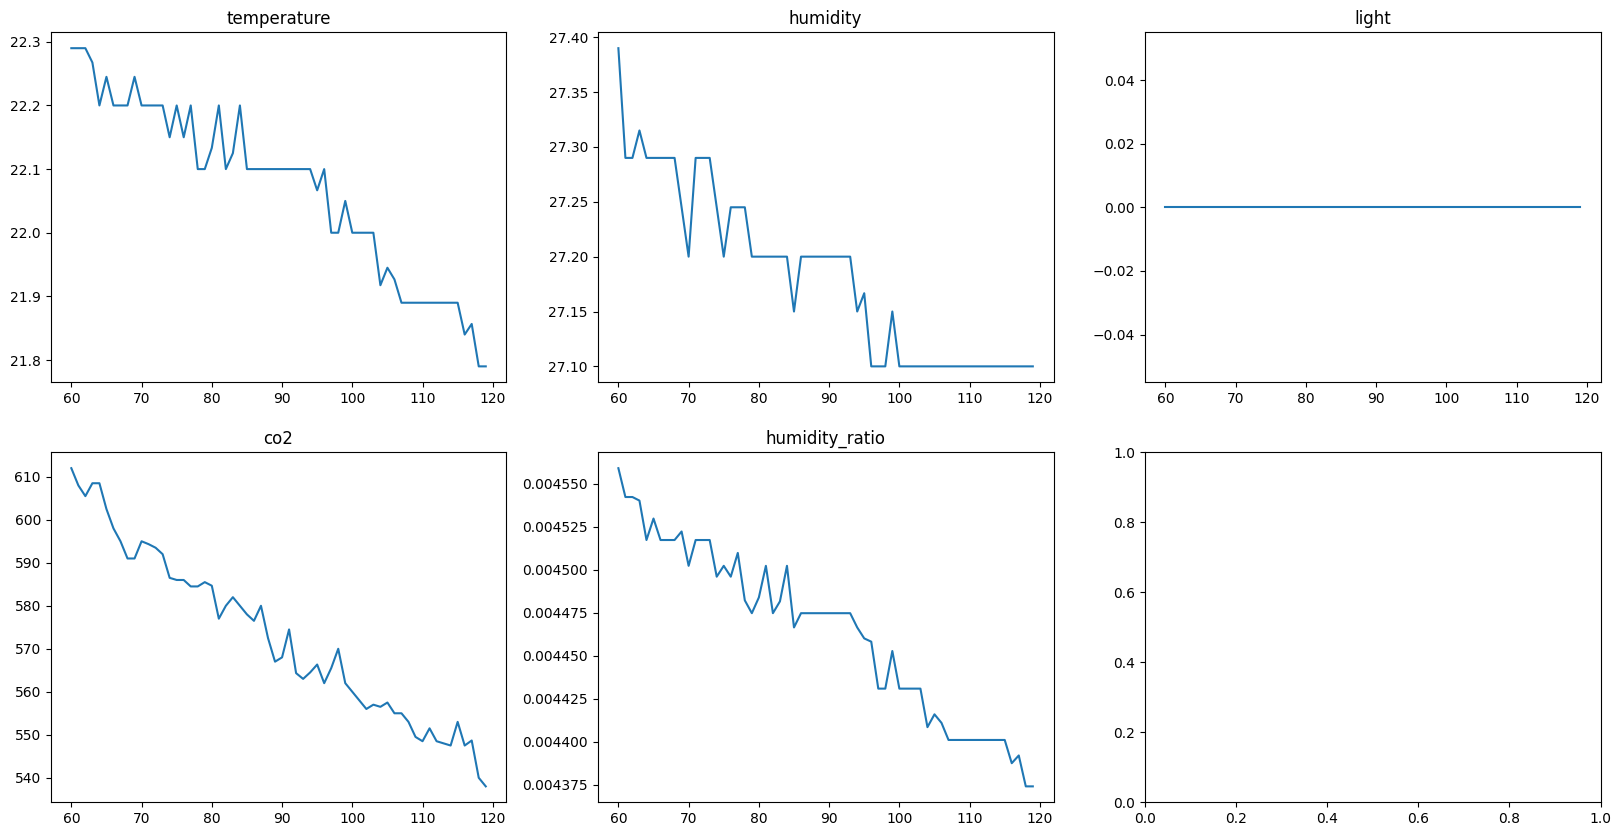

In [5]:
# Plot a time series where occupancy is 0

plot_timeseries(2)

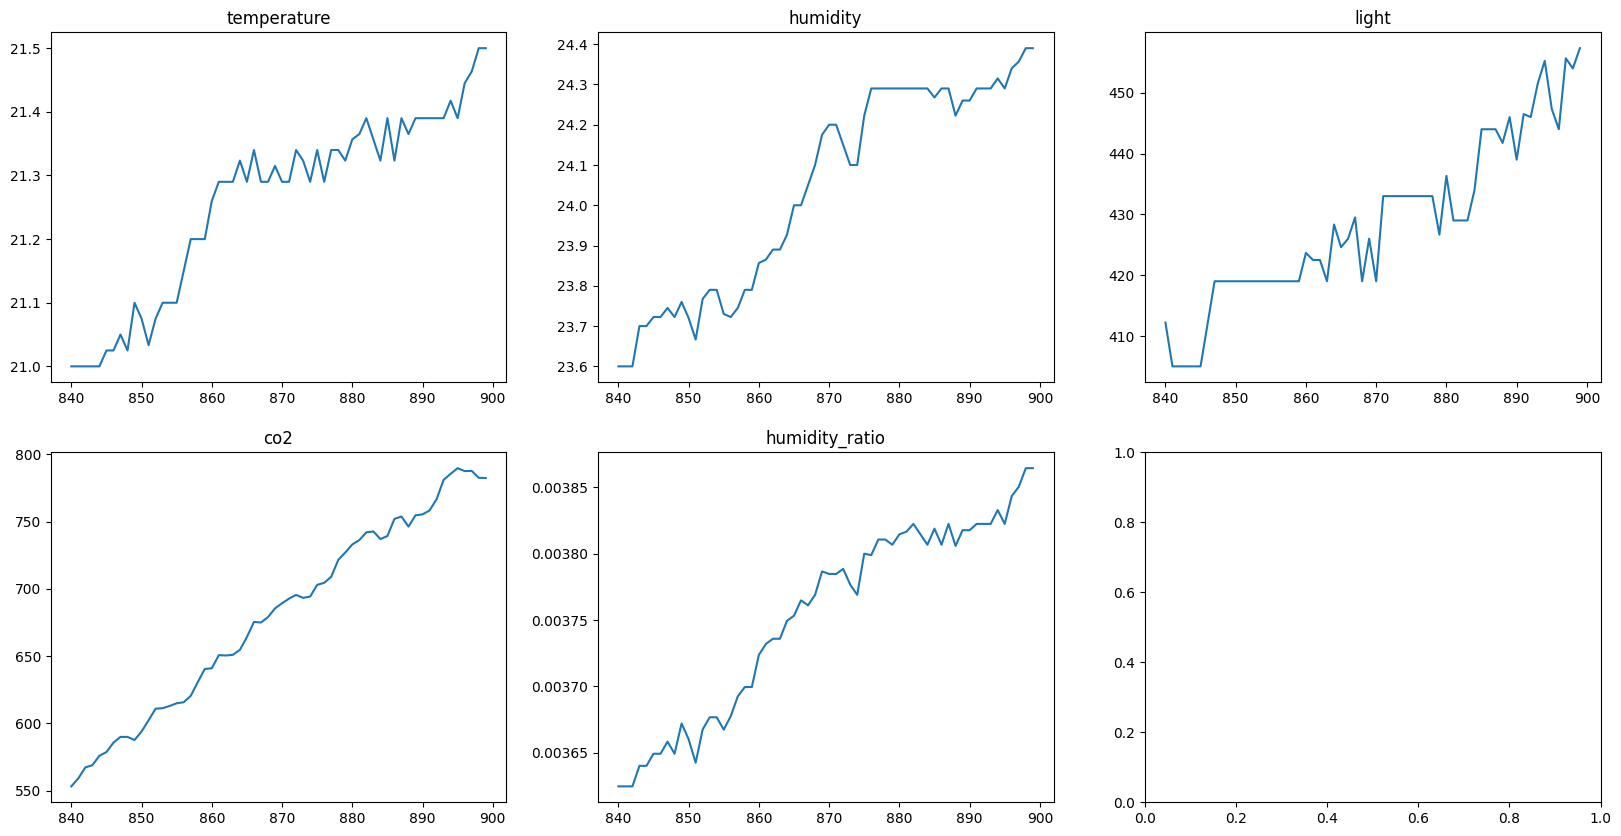

In [6]:
# Plot a time series where occupancy is 1

plot_timeseries(15)

In [7]:
# create features for one time series: light

features = extract_features(X[["id", "light"]], column_id="id")

features.shape

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 27/27 [00:04<00:00,  6.18it/s]


(135, 783)

In [8]:
features.head()

,light__variance_larger_than_standard_deviation,light__has_duplicate_max,light__has_duplicate_min,light__has_duplicate,light__sum_values,light__abs_energy,light__mean_abs_change,light__mean_change,light__mean_second_derivative_central,light__median,...,light__fourier_entropy__bins_5,light__fourier_entropy__bins_10,light__fourier_entropy__bins_100,light__permutation_entropy__dimension_3__tau_1,light__permutation_entropy__dimension_4__tau_1,light__permutation_entropy__dimension_5__tau_1,light__permutation_entropy__dimension_6__tau_1,light__permutation_entropy__dimension_7__tau_1,light__query_similarity_count__query_None__threshold_0.0,light__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,1.0,1.0,2932.5,1228508.25,7.101695,-7.101695,0.0,0.0,...,0.283936,0.283936,0.424254,0.260386,0.351376,0.444582,0.540075,0.63793,NaN,418.928571
2,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,NaN,0.000000
3,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,NaN,0.000000
4,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,NaN,0.000000
5,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,NaN,0.000000


In [9]:
[f for f in features.columns]

['light__variance_larger_than_standard_deviation',
 'light__has_duplicate_max',
 'light__has_duplicate_min',
 'light__has_duplicate',
 'light__sum_values',
 'light__abs_energy',
 'light__mean_abs_change',
 'light__mean_change',
 'light__mean_second_derivative_central',
 'light__median',
 'light__mean',
 'light__length',
 'light__standard_deviation',
 'light__variation_coefficient',
 'light__variance',
 'light__skewness',
 'light__kurtosis',
 'light__root_mean_square',
 'light__absolute_sum_of_changes',
 'light__longest_strike_below_mean',
 'light__longest_strike_above_mean',
 'light__count_above_mean',
 'light__count_below_mean',
 'light__last_location_of_maximum',
 'light__first_location_of_maximum',
 'light__last_location_of_minimum',
 'light__first_location_of_minimum',
 'light__percentage_of_reoccurring_values_to_all_values',
 'light__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'light__sum_of_reoccurring_values',
 'light__sum_of_reoccurring_data_points',
 'light__rati

In [10]:
len([f for f in features.columns if features[f].isnull().mean() > 0.5])

333

In [11]:
# select 5 features to display in book recipe

feats = features.columns[10:15]

feats

Index(['light__mean', 'light__length', 'light__standard_deviation',
       'light__variation_coefficient', 'light__variance'],
      dtype='object')

In [12]:
# display some features (for book)

features[feats].head()

,light__mean,light__length,light__standard_deviation,light__variation_coefficient,light__variance
1,48.875,60.0,134.485582,2.751623,18086.371875
2,0.000,60.0,0.000000,NaN,0.000000
3,0.000,60.0,0.000000,NaN,0.000000
4,0.000,60.0,0.000000,NaN,0.000000
5,0.000,60.0,0.000000,NaN,0.000000


In [13]:
impute(features)

C:\ProgramData\anaconda\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['light__fft_coefficient__attr_"real"__coeff_31'
 'light__fft_coefficient__attr_"real"__coeff_32'
 'light__fft_coefficient__attr_"real"__coeff_33'
 'light__fft_coefficient__attr_"real"__coeff_34'
 'light__fft_coefficient__attr_"real"__coeff_35'
 'light__fft_coefficient__attr_"real"__coeff_36'
 'light__fft_coefficient__attr_"real"__coeff_37'
 'light__fft_coefficient__attr_"real"__coeff_38'
 'light__fft_coefficient__attr_"real"__coeff_39'
 'light__fft_coefficient__attr_"real"__coeff_40'
 'light__fft_coefficient__attr_"real"__coeff_41'
 'light__fft_coefficient__attr_"real"__coeff_42'
 'light__fft_coefficient__attr_"real"__coeff_43'
 'light__fft_coefficient__attr_"real"__coeff_44'
 'light__fft_coefficient__attr_"real"__coeff_45'
 'light__fft_coefficient__attr_"real"__coeff_46'
 'light__fft_coefficient__attr_"real"__coeff_47'
 'light__fft_coefficient__attr_"real"__coeff_48'
 '

,light__variance_larger_than_standard_deviation,light__has_duplicate_max,light__has_duplicate_min,light__has_duplicate,light__sum_values,light__abs_energy,light__mean_abs_change,light__mean_change,light__mean_second_derivative_central,light__median,...,light__fourier_entropy__bins_5,light__fourier_entropy__bins_10,light__fourier_entropy__bins_100,light__permutation_entropy__dimension_3__tau_1,light__permutation_entropy__dimension_4__tau_1,light__permutation_entropy__dimension_5__tau_1,light__permutation_entropy__dimension_6__tau_1,light__permutation_entropy__dimension_7__tau_1,light__query_similarity_count__query_None__threshold_0.0,light__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,1.0,1.0,2932.500000,1.228508e+06,7.101695,-7.101695,0.000000,0.0,...,0.283936,0.283936,0.424254,0.260386,0.351376,0.444582,0.540075,0.637930,0.0,418.928571
2,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
3,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
4,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
5,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
132,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
133,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
134,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.331736,0.518700,1.529166,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000


In [14]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(
    features,
    y,
    test_size=0.1,
    random_state=42,
)

In [15]:
# train and evaluate logistic regression

cls = LogisticRegression(random_state=10, C=0.01)
cls.fit(X_train, y_train)

print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.75      1.00      0.86         3

    accuracy                           0.93        14
   macro avg       0.88      0.95      0.90        14
weighted avg       0.95      0.93      0.93        14



C:\ProgramData\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# create features from all time series

features = extract_features(
    X,
    column_id="id",
    impute_function=impute,
    column_sort="date",
)

features.shape

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:10<00:00,  2.77it/s]


(135, 3915)

In [17]:
# split into train and test

X_train, X_test, y_train, y_t5est = train_test_split(
    features,
    y,
    test_size=0.1,
    random_state=42,
)

In [18]:
# train and evaluate logistic regression

cls = LogisticRegression(random_state=10, C=0.000000000000001)
cls.fit(X_train, y_train)

print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.75      1.00      0.86         3

    accuracy                           0.93        14
   macro avg       0.88      0.95      0.90        14
weighted avg       0.95      0.93      0.93        14

